# Pymaceuticals Inc.
---

### Analysis

- Based on the data, it appears that generally as times goes on, Capomulin does a good job of shrinking tumors in mice. However, at around 25 days, the tumor size seems to grow again and then continue shrinking. This is a veryc interesting observation. Additionally, the data reveals that the larger a mouse is, the larger its tumor will be. 
 

In [110]:
 %matplotlib notebook

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [112]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [113]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking the number of mice.
complete_df['Mouse ID'].nunique()

249

In [115]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_df[complete_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicates["Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =  complete_df[complete_df['Mouse ID'] != "g989"] 
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [118]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped = clean_df.groupby(['Drug Regimen'])

mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

summary_stats1 = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": std,
                              "SEM": sem})

summary_stats1
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [120]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [121]:
bar_plt = clean_df.groupby(['Drug Regimen'])["Timepoint"].count().reset_index()

In [122]:
time = bar_plt.agg(pd.Series.tolist)
time

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [123]:
x_axis = np.arange(len(time))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [129]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, time["Timepoint"], align="center")

<BarContainer object of 10 artists>

<IPython.core.display.Javascript object>


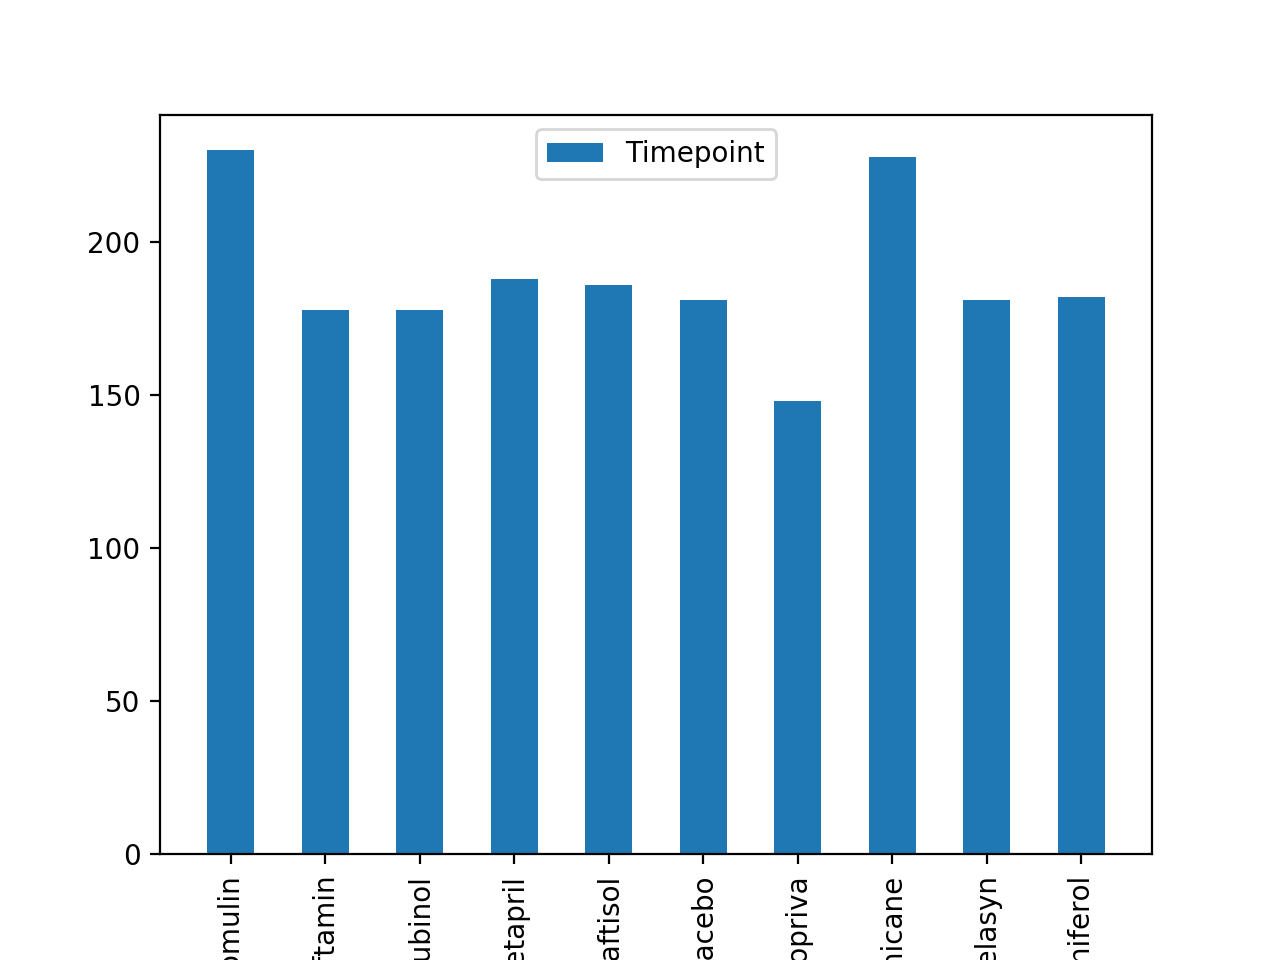

In [130]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time.plot.bar(x='Drug Regimen', y='Timepoint')

In [131]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, time["Drug Regimen"])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [132]:
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 9.75)

<IPython.core.display.Javascript object>


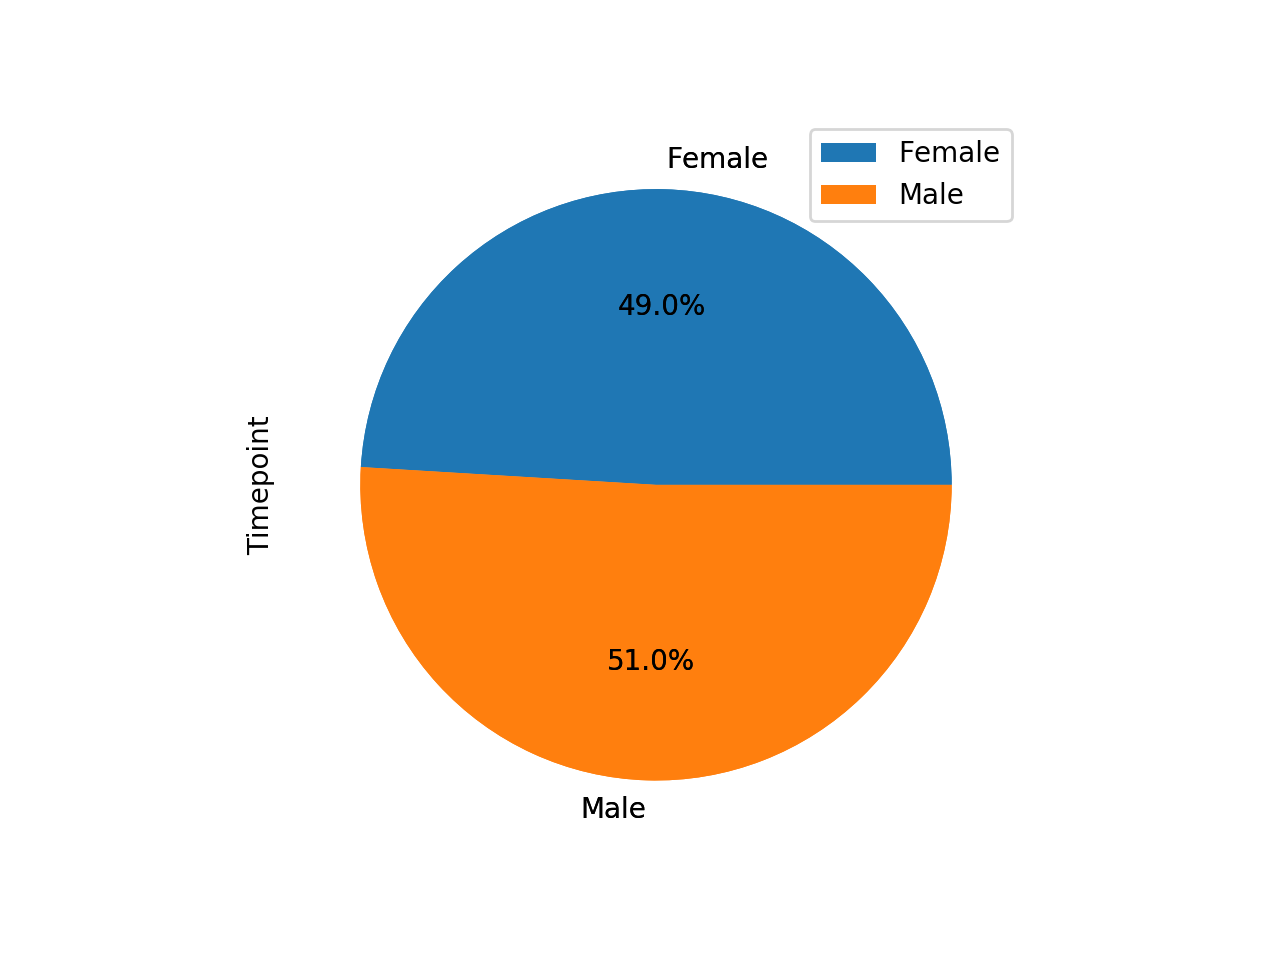

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender.plot.pie(y='Timepoint', labels=gender['Sex'], autopct='%.1f%%')

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plt = clean_df.groupby(['Sex'])["Timepoint"].count().reset_index()

In [135]:
gender = pie_plt.agg(pd.Series.tolist)
gender

,Sex,Timepoint
0,Female,922
1,Male,958


In [136]:
plt.pie(gender["Timepoint"], labels= gender["Sex"], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby(['Mouse ID'])
max_timepoint = mouse_group['Timepoint'].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_timepoint, on=['Mouse ID', 'Timepoint'])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df["Drug Regimen"].agg(pd.Series.tolist)
unique_treatments = set(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = merged_df["Tumor Volume (mm3)"].quantile(0.25)

# Calculate the 75th percentile
Q3 = merged_df["Tumor Volume (mm3)"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1
IQR

19.17775725750002

In [139]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
drug_data_c = merged_df[merged_df['Drug Regimen'] == "Capomulin" ]
drug_data_c

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [140]:
drug_data_r = merged_df[merged_df['Drug Regimen'] == "Ramicane"]
drug_data_r

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1
11,n364,Ramicane,Male,4,17,45,31.095335,1
15,c758,Ramicane,Male,9,17,45,33.397653,1
17,a644,Ramicane,Female,7,17,45,32.978522,1
18,i177,Ramicane,Male,10,18,45,33.562402,3


In [141]:
drug_data_i = merged_df[merged_df['Drug Regimen'] == "Infubinol"]
drug_data_i    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
57,a577,Infubinol,Female,6,25,30,57.031862,2
58,a685,Infubinol,Male,8,30,45,66.083066,3
70,c139,Infubinol,Male,11,28,45,72.226731,2
74,c326,Infubinol,Female,18,25,5,36.321346,0
82,c895,Infubinol,Female,7,29,30,60.969711,2
90,e476,Infubinol,Male,23,26,45,62.435404,1
95,f345,Infubinol,Male,23,26,45,60.918767,1
111,i386,Infubinol,Female,23,29,40,67.289621,4


In [142]:
drug_data_ce = merged_df[merged_df['Drug Regimen'] == "Ceftamin"]
drug_data_ce    
    
    # Determine outliers using upper and lower bounds

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
52,a275,Ceftamin,Female,20,28,45,62.999356,3
65,b447,Ceftamin,Male,2,30,0,45.000000,0
66,b487,Ceftamin,Female,6,28,25,56.057749,1
68,b759,Ceftamin,Female,12,25,30,55.742829,1
97,f436,Ceftamin,Female,3,25,15,48.722078,2
110,h531,Ceftamin,Male,5,27,5,47.784682,0
117,j296,Ceftamin,Female,24,30,45,61.849023,3
121,k210,Ceftamin,Male,15,28,45,68.923185,3
132,l471,Ceftamin,Female,7,28,45,67.748662,1
133,l490,Ceftamin,Male,24,26,30,57.918381,3


<IPython.core.display.Javascript object>


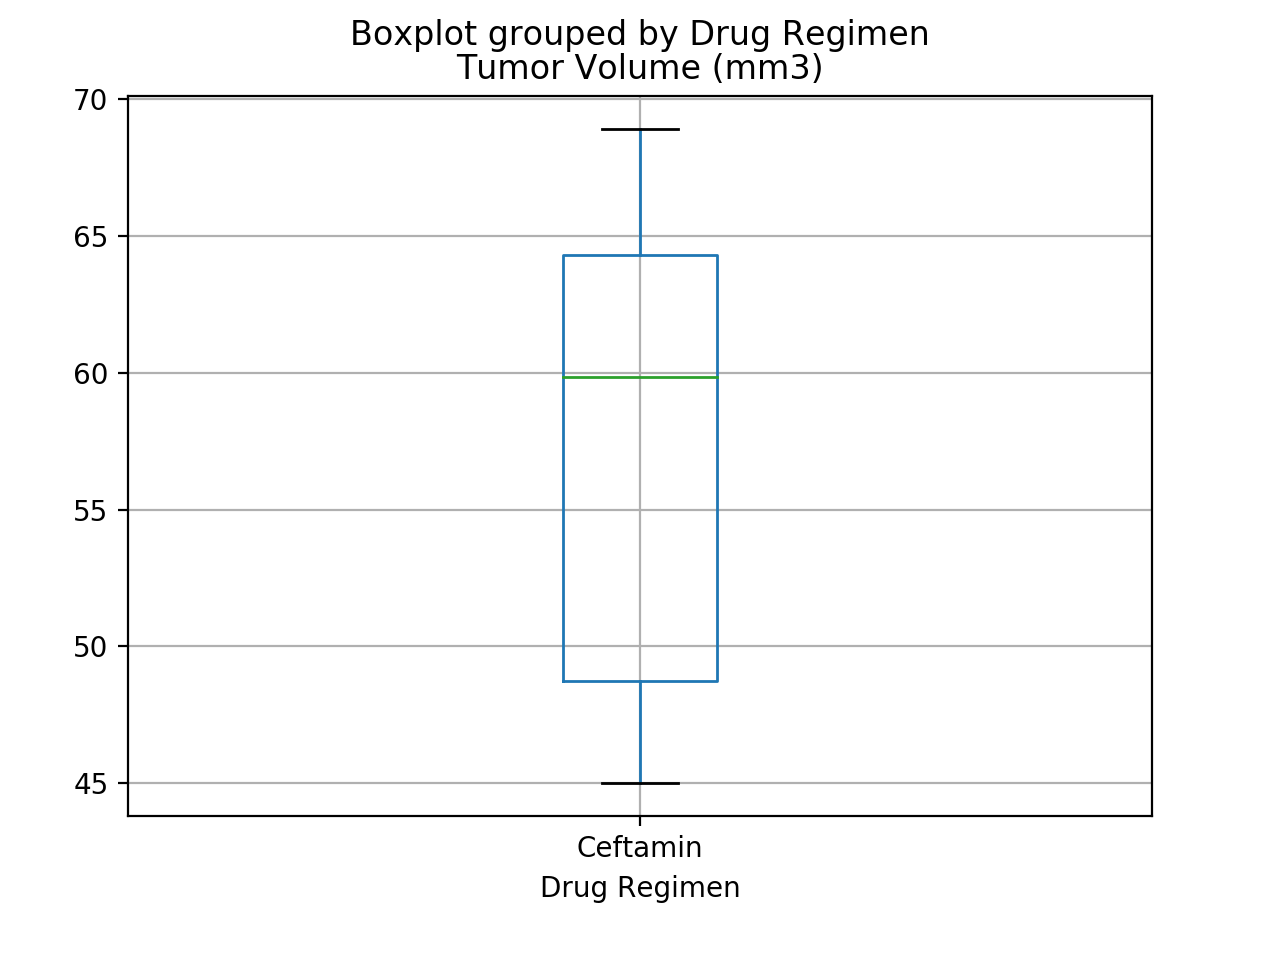

<IPython.core.display.Javascript object>


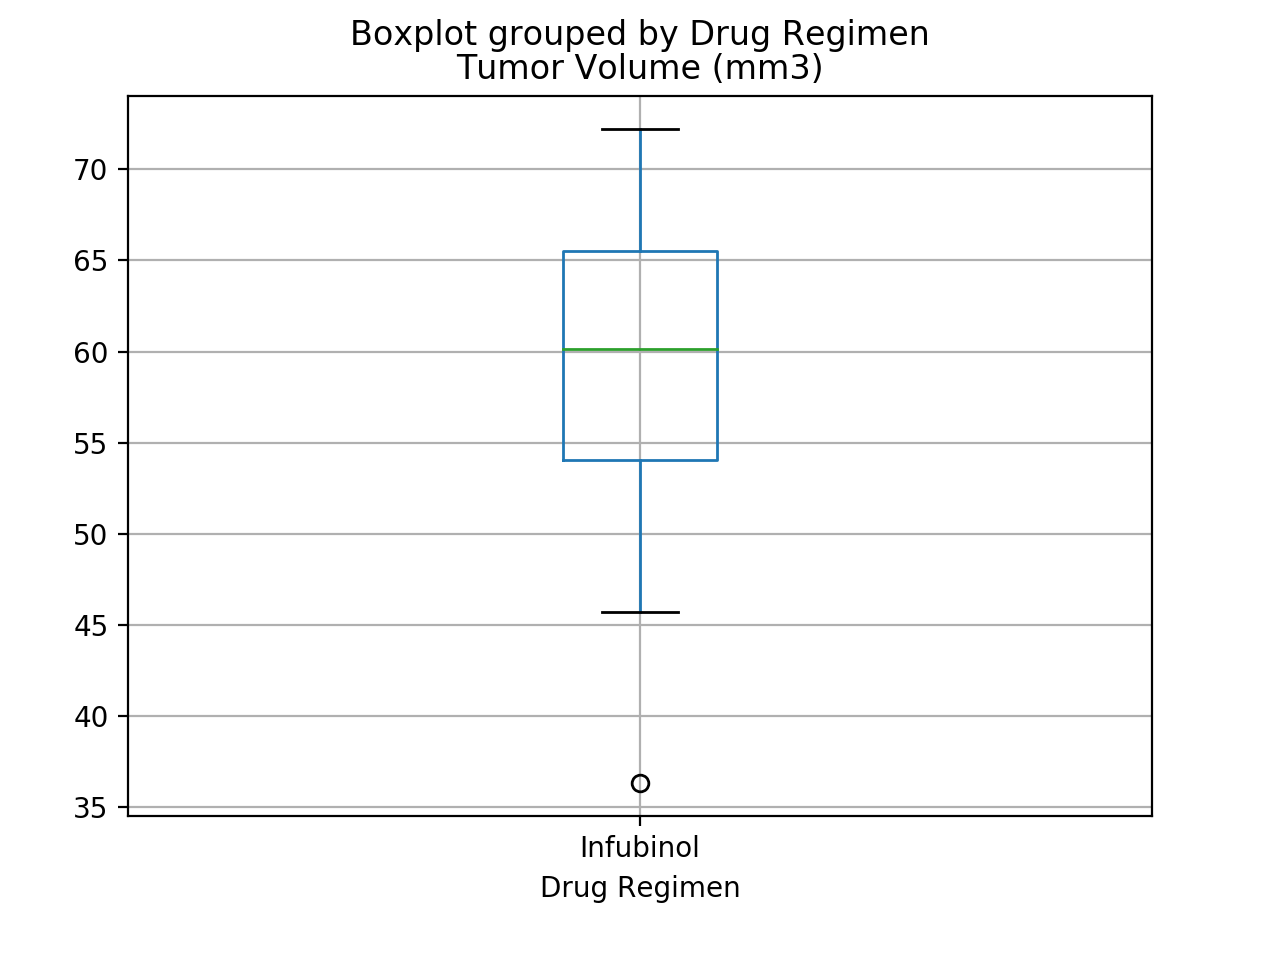

<IPython.core.display.Javascript object>


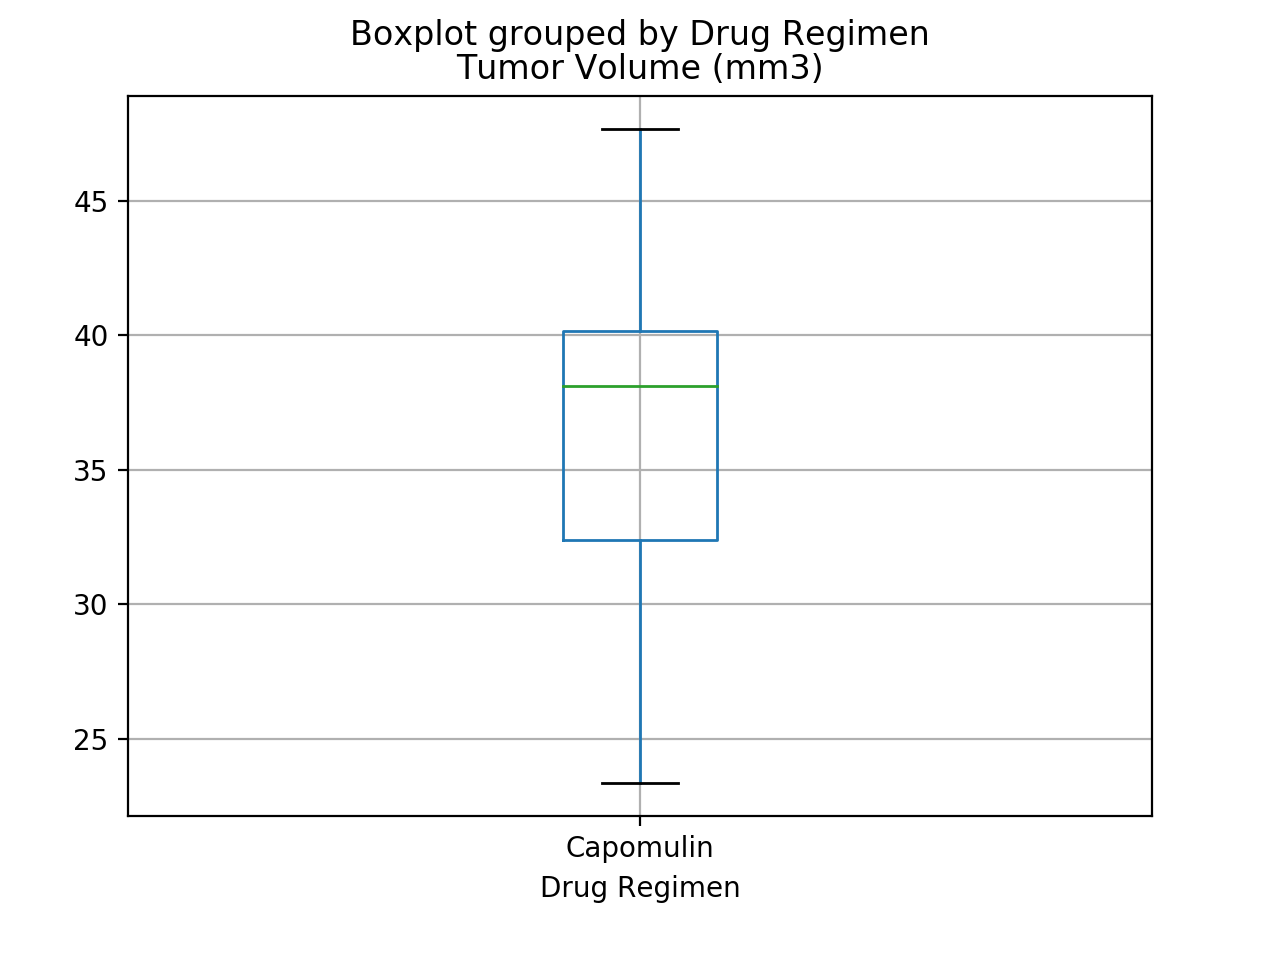

<IPython.core.display.Javascript object>


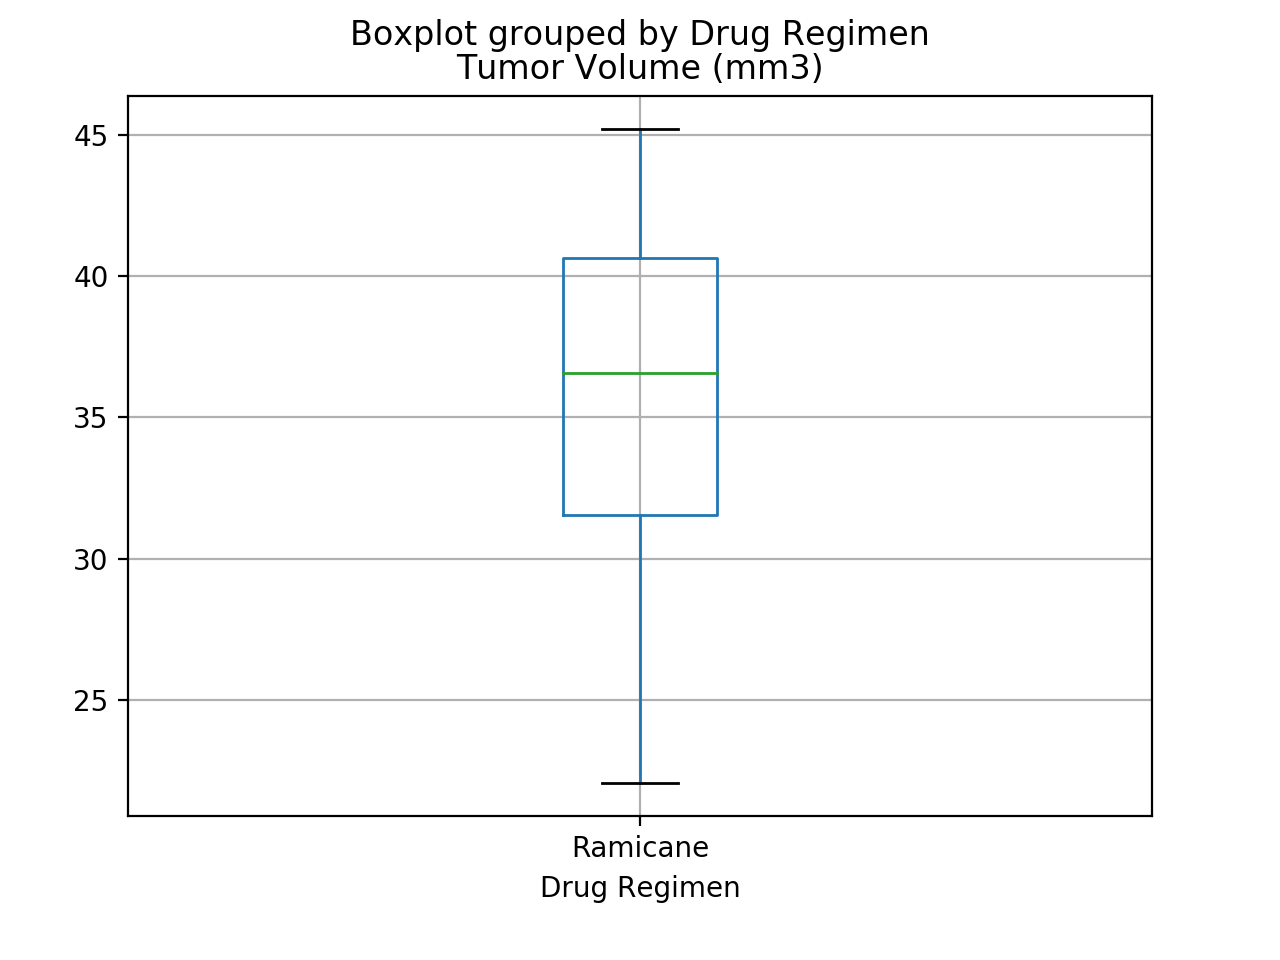

In [143]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_data_ce.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
drug_data_i.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
drug_data_c.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
drug_data_r.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')


## Line and Scatter Plots

<IPython.core.display.Javascript object>


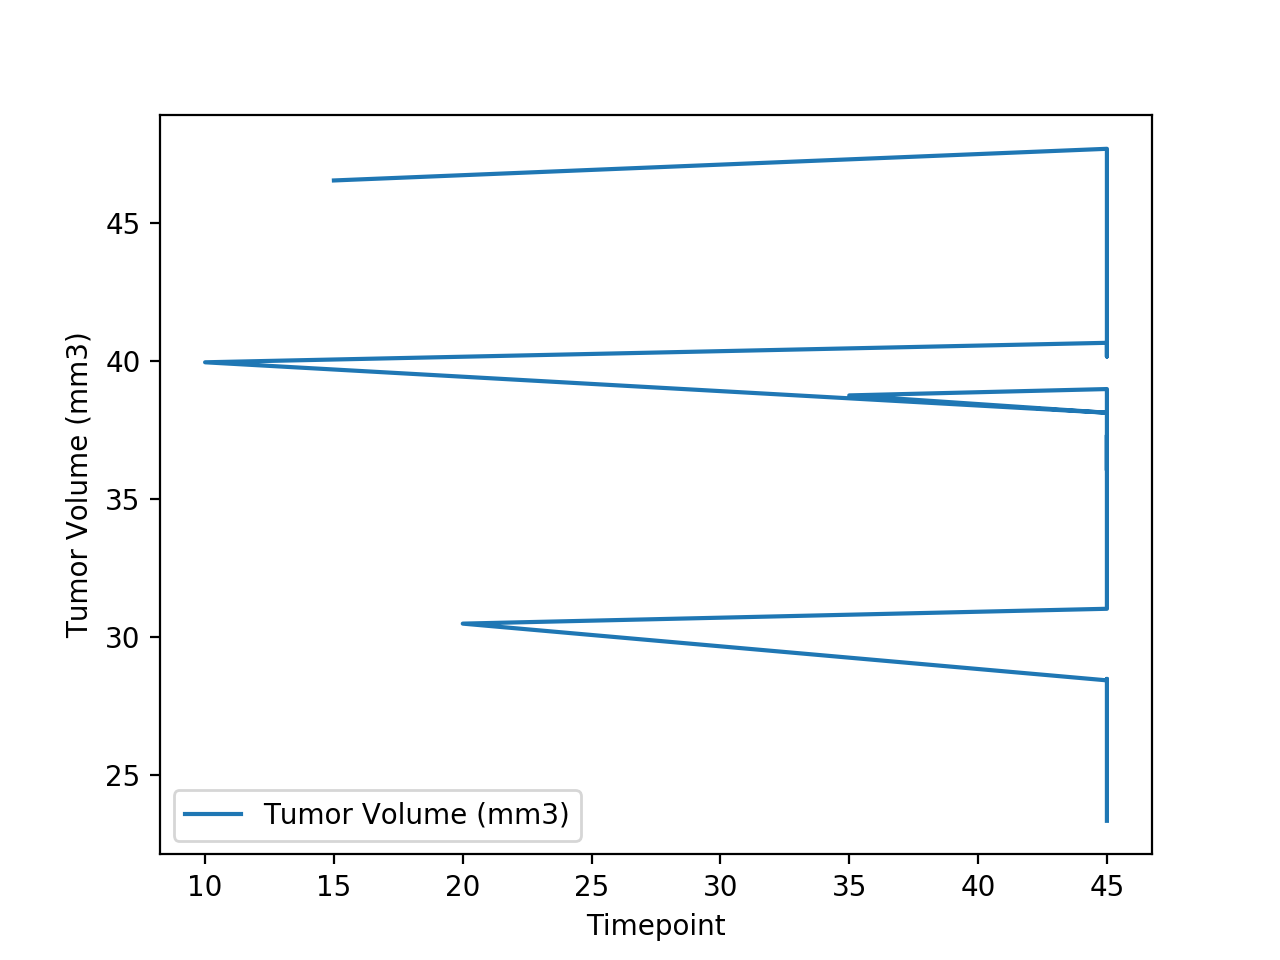

Text(0, 0.5, 'Tumor Volume (mm3)')

In [144]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_data_c.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')

<IPython.core.display.Javascript object>


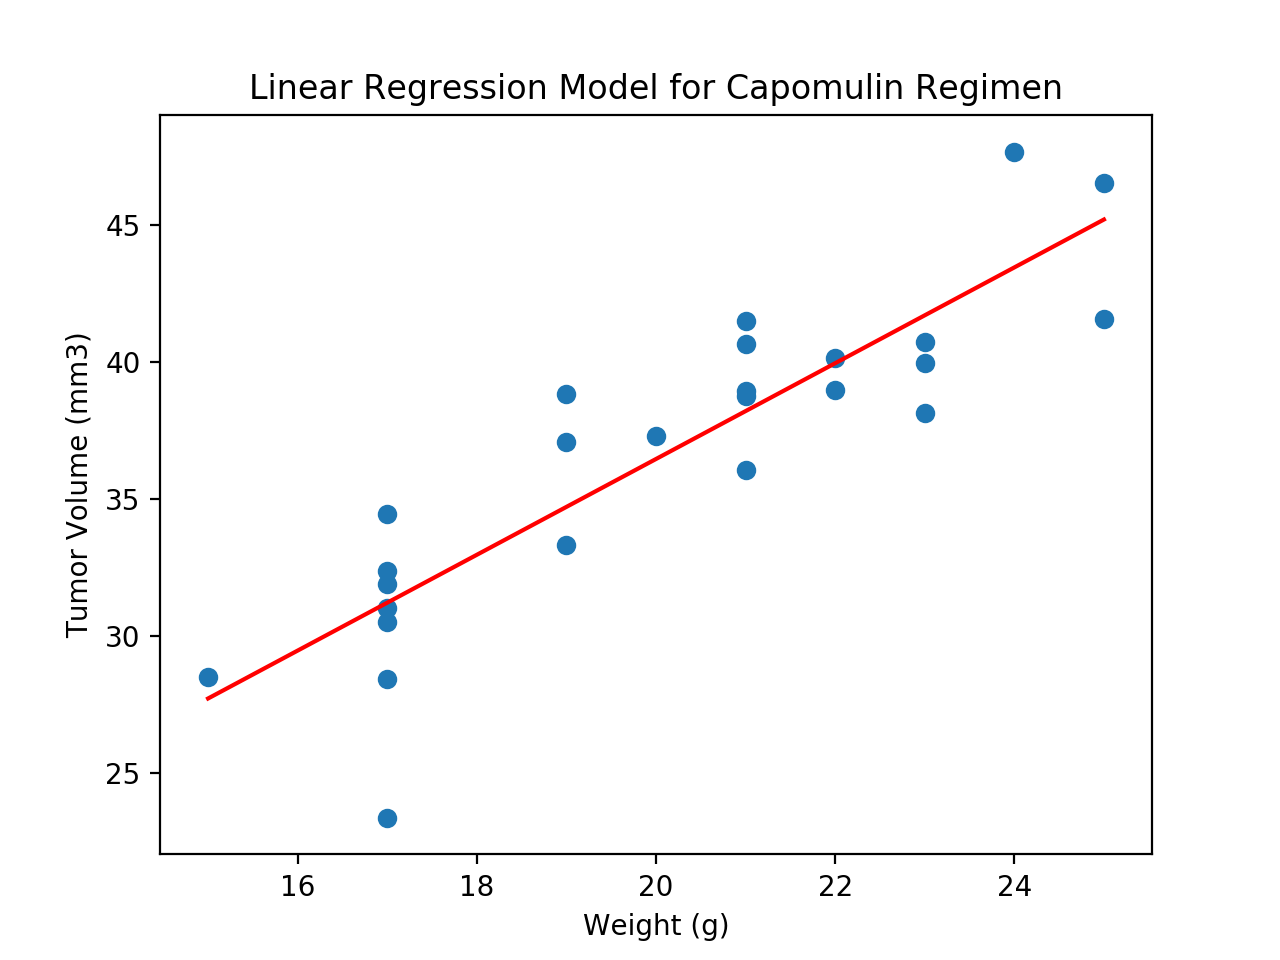

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_data_c.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')


## Correlation and Regression

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
np.corrcoef(drug_data_c["Weight (g)"], drug_data_c["Tumor Volume (mm3)"])

array([[1.        , 0.87670604],
       [0.87670604, 1.        ]])

In [147]:
coefficients = np.polyfit(drug_data_c['Weight (g)'], drug_data_c['Tumor Volume (mm3)'], 1)

In [148]:
x_fit = np.linspace(min(drug_data_c['Weight (g)']), max(drug_data_c['Weight (g)']), 100)
y_fit = coefficients[0] * x_fit + coefficients[1]


plt.scatter(drug_data_c['Weight (g)'], drug_data_c['Tumor Volume (mm3)'])
plt.plot(x_fit, y_fit, 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()